In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
datas = [train, test]
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
for data in datas:
    print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


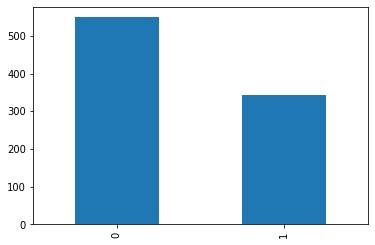

In [ ]:
train['Survived'].value_counts().plot.bar()

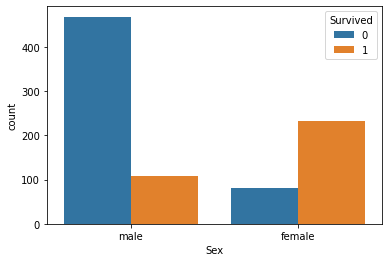

In [ ]:
sns.countplot('Sex', hue='Survived', data=train)

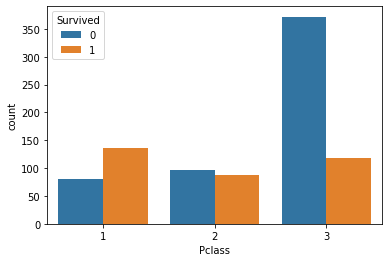

In [ ]:
sns.countplot('Pclass', hue='Survived', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


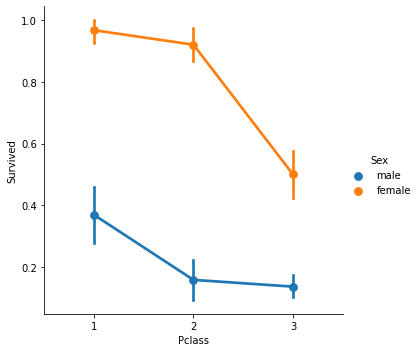

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


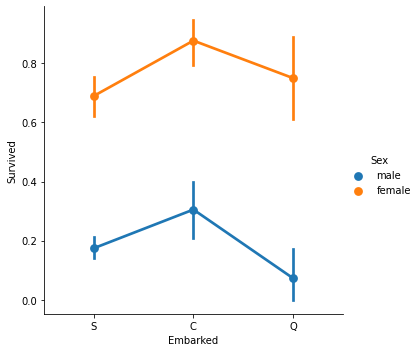

In [ ]:
sns.factorplot('Embarked', 'Survived', hue='Sex', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


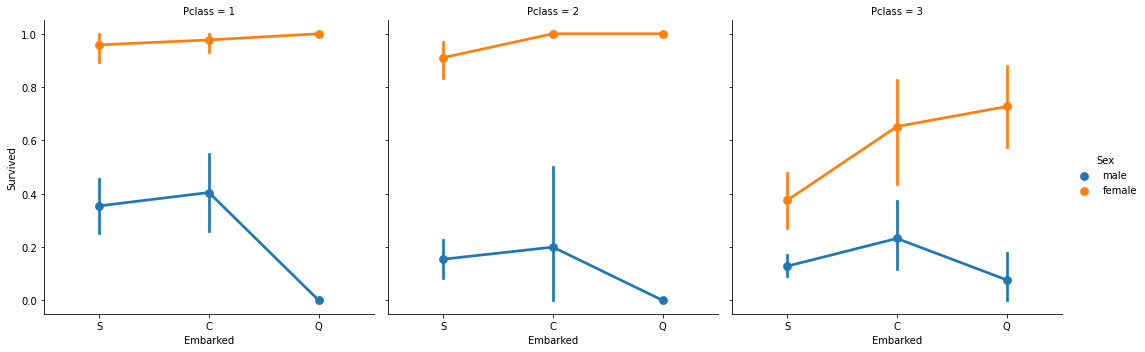

In [ ]:
sns.factorplot('Embarked', 'Survived', hue='Sex', col='Pclass', data=train)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('train.csv')
datas = [train, test]

In [ ]:
for data in datas:
    data['initial'] = 0
    data['initial'] = data['Name'].str.extract('([A-Za-z]+)\.') # A-Za-z로 이뤄져있으며 .으로 끝나는 데이터를 찾고 싶다.
train['initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
# 이름에 있는 이상한 데이터를 교체해준다 (replace)
for data in datas:
    data['initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Other'], inplace=True)

In [ ]:
train.groupby('initial')['Age'].mean()

initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
for data in datas:
    data.loc[(data['Age'].isnull()) & (data['initial'] == 'Master'), 'Age'] = 5
    data.loc[(data['Age'].isnull()) & (data['initial'] == 'Miss'), 'Age'] = 22
    data.loc[(data['Age'].isnull()) & (data['initial'] == 'Mr'), 'Age'] = 33
    data.loc[(data['Age'].isnull()) & (data['initial'] == 'Mrs'), 'Age'] = 36
    data.loc[(data['Age'].isnull()) & (data['initial'] == 'Other'), 'Age'] = 46

In [ ]:
print(datas[0]['Age'].isnull().sum())
print(datas[1]['Age'].isnull().sum())
print(datas[0]['initial'].unique())
print(datas[1]['initial'].unique())

0
0
['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [ ]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
for data in datas:
    data['Embarked'].fillna('nan', inplace=True)
for data in datas:
    embark = data.loc[data['Embarked'].isnull(), 'Embarked']
    print(embark.sum())

0
0


In [ ]:
# Fare 
train.groupby('Pclass')['Fare'].mean()
for data in datas:
    data.loc[(data['Fare'].isnull()) & (data['Pclass'] == '1')] == 84
    data.loc[(data['Fare'].isnull()) & (data['Pclass'] == '2')] == 21
    data.loc[(data['Fare'].isnull()) & (data['Pclass'] == '3')] == 14

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
for data in datas:
    data['Age_band'] = 0
    data.loc[data['Age']<=16, 'Age_band'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 0
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 0
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 0
    data.loc[data['Age'] > 64, 'Age_band'] = 0

In [ ]:
for data in datas:
    data['Family_size'] = 0
    data['Family_size'] = data['Parch'] + data['SibSp']
    data['Alone'] = 0
    data.loc[data['Family_size'] == 0, 'Alone'] = 1

In [ ]:
for data in datas:
    data['initial'].replace(['Master', 'Miss', 'Mr', 'Mrs', 'Other'],[4, 3, 1, 2, 5], inplace = True)
    data['Embarked'].replace(['S','C','Q', 'nan'], [0,1,2,3], inplace = True)
    data['Sex'].replace(['male','female'], [0,1], inplace=True)

In [ ]:
for data in datas:
    data.drop(['Name', 'Age', 'Ticket','Cabin', 'PassengerId'], axis=1, inplace=True)

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'initial', 'Age_band', 'Family_size', 'Alone'],
      dtype='object')

In [ ]:
test.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'initial', 'Age_band', 'Family_size', 'Alone'],
      dtype='object')

In [ ]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,initial,Age_band,Family_size,Alone
0,0,3,0,1,0,7.2500,0,1,0,1,0
1,1,1,1,1,0,71.2833,1,2,0,1,0
2,1,3,1,0,0,7.9250,0,3,0,0,1
3,1,1,1,1,0,53.1000,0,2,0,1,0
4,0,3,0,0,0,8.0500,0,1,0,0,1


# Make Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier # 최적화 된 값을 선택할 때 사용
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
x = train[train.columns[1:]]
y = train['Survived']
print(x)
print(y)

     Pclass  Sex  SibSp  Parch  ...  initial  Age_band  Family_size  Alone
0         3    0      1      0  ...        1         0            1      0
1         1    1      1      0  ...        2         0            1      0
2         3    1      0      0  ...        3         0            0      1
3         1    1      1      0  ...        2         0            1      0
4         3    0      0      0  ...        1         0            0      1
..      ...  ...    ...    ...  ...      ...       ...          ...    ...
886       2    0      0      0  ...        5         0            0      1
887       1    1      0      0  ...        3         0            0      1
888       3    1      1      2  ...        3         0            3      0
889       1    0      0      0  ...        1         0            0      1
890       3    0      0      0  ...        1         0            0      1

[891 rows x 10 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888

In [ ]:
# RandomForest
rf = RandomForestClassifier()
## Grid Search

# 파라미터 그룹 생성
rf_param_grid = {
    'max_depth': [None], # default 값 사용
    'max_features': [1, 3, 10],
    'min_samples_split':[2, 3, 10],
    'min_samples_leaf':[1, 3, 10],
    'bootstrap':[False],
    'n_estimators':[100, 300, 500, 700, 800, 900]
}
rf_grid = GridSearchCV(rf, param_grid= rf_param_grid, scoring='accuracy', n_jobs=4, verbose=1) # verbose: 백그라운드 옵션에서도 쓸 수 있도록
rf_grid.fit(x,y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   33.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 10.0min
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed: 10.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
rf_best = rf_grid.best_estimator_
print(rf_grid.best_score_)
print(rf_best)

0.8316552633230808
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [126]:
# GradientBoost
gb = GradientBoostingClassifier()
# Grid Search
gb_param_grid ={
    'loss':['deviance'],
    'n_estimators':[100, 300, 500, 1000],
    'learning_rate':[0.1, 0.05, 0.01],
    'max_depth':[4, 8],
    'max_features':[0.3, 0.1],
    'min_samples_leaf':[100, 150, 200]
}

gb_grid = GridSearchCV(gb, param_grid = gb_param_grid, scoring = 'accuracy', n_jobs=4, verbose=1)
gb_grid.fit(x,y)

gb_best = gb_grid.best_estimator_
print(gb_grid.best_score_)
print(gb_best)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  2.7min finished


0.8170610758897746
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [113]:
# SVM
svc = SVC(probability=True) # !! porbability가 True 상태가 아니면 predict를 실행할 수 없다.
svc_param_grid = {'kernel':['rbf'], 'gamma':[0.001, 0.01, 0.1, 0.5, 1], 'C':[0.01, 0.1, 1, 10, 50, 100, 200, 300]}

svc_grid = GridSearchCV(svc, param_grid = svc_param_grid, scoring='accuracy', n_jobs=4, verbose=1) # verbose가 0이면 백그라운드에서 실행되기 때문에 결과를 확인할 수 없다.
svc_grid.fit(x,y)
svc_best = svc_grid.best_estimator_
print(svc_grid.best_score_)
print(svc_grid.best_params_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   33.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   34.9s finished


0.8058439520431863
{'C': 300, 'gamma': 0.001, 'kernel': 'rbf'}


In [127]:
# voting
vote = VotingClassifier(estimators=[('rf', rf_best), ('gb', gb_best), ('svc', svc_best)], voting='soft', n_jobs =4)
vote_result = vote.fit(x,y)

In [128]:
# pred = vote.predict(test)
vote_result

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=3,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     min_weight_fraction_leaf=0.0,
           

In [129]:
pred = vote.predict(test)

In [131]:
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [132]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [133]:
mlp = MLPClassifier()
mlp_param_grid = {
    'solver':['sgd', 'adam'],
    'hidden_layer_sizes':[100, 200, 300],
    'random_state':[1]
}
mlp_grid = GridSearchCV(mlp, param_grid=mlp_param_grid, scoring='accuracy', n_jobs=4, verbose=1)
mlp_grid.fit(x,y)

mlp_best = mlp_grid.best_estimator_
print(mlp_grid.best_score_)
print(mlp_best)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:   17.1s finished


0.8170485217500472
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=200, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [135]:
# voting
vote = VotingClassifier(estimators=[('rf', rf_best), ('gb', gb_best), ('svc', svc_best), ('mlp', mlp_best)], voting='soft', n_jobs =4)
vote_result = vote.fit(x,y)
vote_result

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=3,
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=3,
                                                     min_samples_split=10,
                                                     min_weight_fraction_leaf=0.0,
           

In [136]:
pred = vote.predict(test)
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,